In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

In [7]:
df = pd.read_csv('/content/magic_gamma_telescope04_.csv')
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [8]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [9]:
df.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   19020 non-null  float64
 1   fwidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconc1    19020 non-null  float64
 5   fsym      19020 non-null  float64
 6   fm3long   19020 non-null  float64
 7   fm3trans  19020 non-null  float64
 8   falpha    19020 non-null  float64
 9   dist      19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [11]:
X = df.drop('class', axis=1).values
y = df['class'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scale = MinMaxScaler()    #Scaling

In [14]:
train_fit = scale.fit(X_train)

In [15]:
X_train = train_fit.transform(X_train)
X_test = train_fit.transform(X_test)

In [16]:
le = LabelEncoder()
y_en = le.fit_transform(y)
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)

In [17]:
X_train.shape, X_test.shape

((15216, 10), (3804, 10))

In [18]:
model = Sequential()                                        #Evaluation

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [35]:
model.fit(X_train, y_train_en, batch_size=12, epochs=50, 
          validation_data=(X_test, y_test_en), callbacks=[early_stop])

Epoch 1/50
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3126 - accuracy: 0.8674 - val_loss: 0.3291 - val_accuracy: 0.8641
Epoch 2/50
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8665 - val_loss: 0.3325 - val_accuracy: 0.8633
Epoch 3/50
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8680 - val_loss: 0.3154 - val_accuracy: 0.8665
Epoch 4/50
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3139 - accuracy: 0.8666 - val_loss: 0.3179 - val_accuracy: 0.8670
Epoch 5/50
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3126 - accuracy: 0.8680 - val_loss: 0.3228 - val_accuracy: 0.8620
Epoch 6/50
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8697 - val_loss: 0.3216 - val_accuracy: 0.8625
Epoch 7/50
1268/1268 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.8671 - val_loss: 0.3213 - val_accuracy:

In [36]:
ann_metrics = pd.DataFrame(model.history.history)
ann_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.312627,0.867376,0.329081,0.864090
1,0.312100,0.866456,0.332478,0.863302
2,0.313124,0.867968,0.315445,0.866456
3,0.313853,0.866588,0.317880,0.866982
4,0.312625,0.868034,0.322850,0.861987
5,0.311310,0.869677,0.321610,0.862513
6,0.312909,0.867114,0.321252,0.859096
7,0.312419,0.866522,0.325632,0.859359


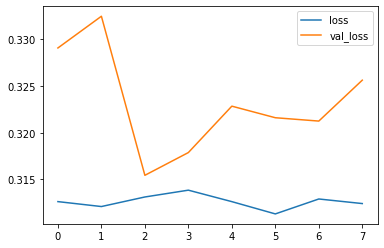

In [37]:
ann_metrics[['loss', 'val_loss']].plot()

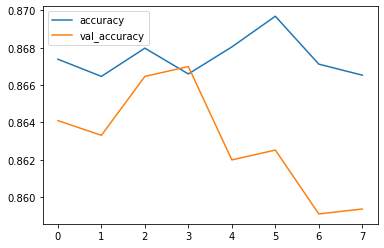

In [38]:
ann_metrics[['accuracy', 'val_accuracy']].plot()

In [39]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [40]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2460
           1       0.81      0.79      0.80      1344

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [41]:
confusion_matrix(y_test_en, predictions)

array([[2209,  251],
       [ 284, 1060]])

In [42]:
accuracy_score(y_test_en, predictions)

0.8593585699263933

In [43]:
f1_score(y_test_en, predictions)

0.7984934086629002